# Linear regression notebook in python

**by  Sanket Shrikant Patil (3105633)**

Import basic Libraries
- **pandas** for data manipulation and analysis
- **numpy** to perform a number of mathematical operations on arrays,multidimensional matrix such as trigonometric, statistical, and algebraic
- **matplotlib** for graphical representation 
- **seaborn** is a wrapper for matplotlib which is easy for some type of plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x= pd.read_csv('D:/project_linear_regression/dataset.csv')

### Exploratory Data Analysis

- see first 6 rows of a dtaframe

In [3]:
x.head(6)

,Unnamed: 0,X,Y
0,1,4.01,1.20
1,2,4.07,0.78
2,3,4.08,0.83
3,4,4.10,0.98
4,5,4.18,0.65
5,6,4.20,0.76


- check the data types and null values

In [4]:
x.info()
x.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     int64  
 1   X           16 non-null     float64
 2   Y           16 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 512.0 bytes


Unnamed: 0    0
X             0
Y             0
dtype: int64

- check the spread of the data

In [5]:
x.describe()#.T

,Unnamed: 0,X,Y
count,16.000000,16.000000,16.000000
mean,8.500000,4.345625,0.470000
std,4.760952,0.245030,0.355809
min,1.000000,4.010000,0.040000
25%,4.750000,4.160000,0.182500
50%,8.500000,4.285000,0.395000
75%,12.250000,4.520000,0.765000
max,16.000000,4.770000,1.200000


- plot boxplot for X and Y

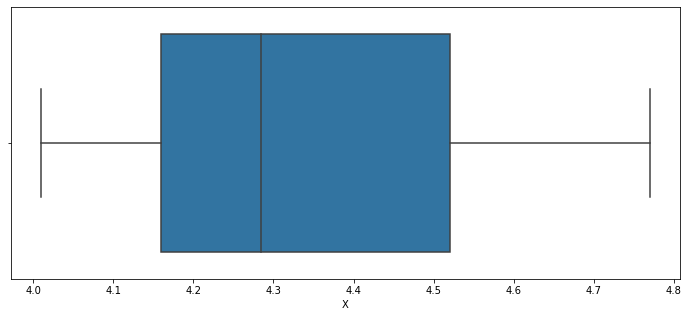

In [6]:
plt.figure(figsize=(12,5))
sns.boxplot(x.X)

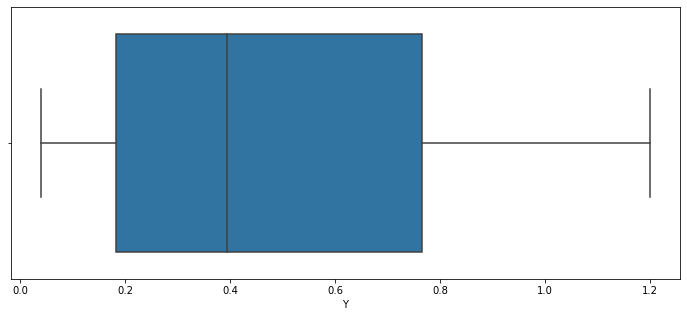

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(x.Y)

- see correlation of each variable

In [8]:
x.corr()

,Unnamed: 0,X,Y
Unnamed: 0,1.000000,0.987792,-0.950026
X,0.987792,1.000000,-0.924790
Y,-0.950026,-0.924790,1.000000


- scatterplot of the dataset

<ipython-input-9-19c33a2affdc>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Y~X')]

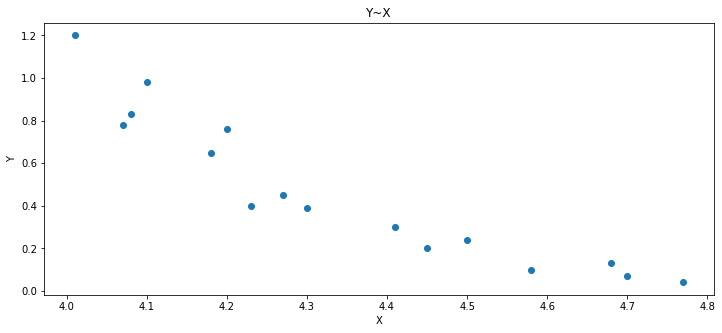

In [9]:
plt.figure(figsize=(12,5))

plt.scatter(x["X"],x["Y"])
ax = plt.axes()
ax.set(xlabel='X', 
       ylabel='Y',
       title='Y~X')

###  Machine Learning

- reshape the data in order to make 2-D data

In [10]:
X = x.X
y = x.Y
X= X.values.reshape(-1,1)
y= y.values.reshape(-1,1)

In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

- import linear regressor from sklearn
- train(fit) linear model

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(X,y)

- print intercept, slope of the linear model, r^2 

In [13]:
print('intercept:',lm.intercept_)
print("slope:",lm.coef_)
print("R^2=", lm.score(X,y))

intercept: [6.30570436]
slope: [[-1.34289184]]
R^2= 0.8552361210855701


- predict y for x= 5

In [14]:
lm.predict([[5]])

array([[-0.40875485]])

- plot linear model 

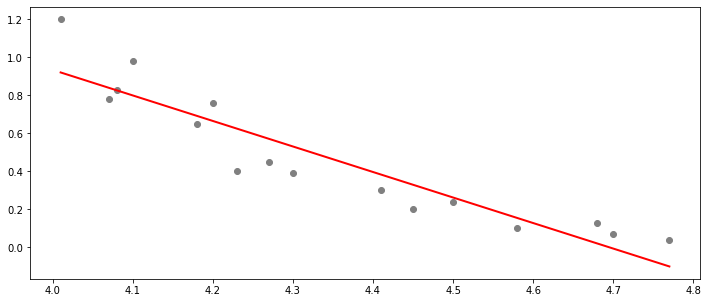

In [15]:
y_pred = lm.predict(X)

plt.figure(figsize=(12,5))
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

- to visualize model performance, plot real values Vs predicted values 
- **points more near to the diagonal line are predicted more accurately by the model** 

<ipython-input-16-d7cfdfafbd70>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Predicted Values'), Text(0.5, 0, 'Real Values')]

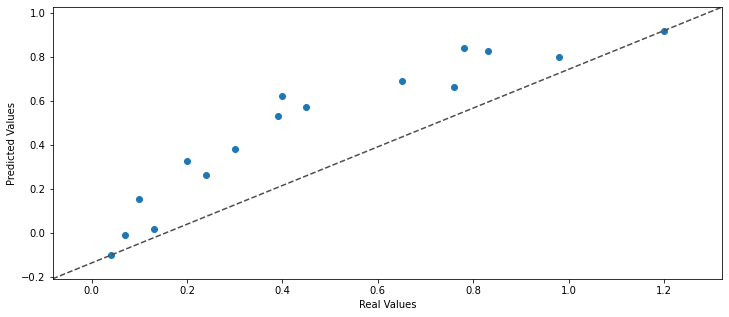

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(y,y_pred)


ax = plt.axes()
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()
diag_line.set_data(x_lims, y_lims)



ax.set(xlabel='Real Values', 
       ylabel='Predicted Values')

### Repeat the process with polynomial degree 2

In [17]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

In [18]:
lm2 = lm.fit(x_quad,y)

In [19]:
print('intercept:',lm2.intercept_)
print("slope:",lm2.coef_)
print("R^2=", lm.score(x_quad,y))

intercept: [46.90719113]
slope: [[  0.         -19.90935804   2.11614778]]
R^2= 0.9403817439181303


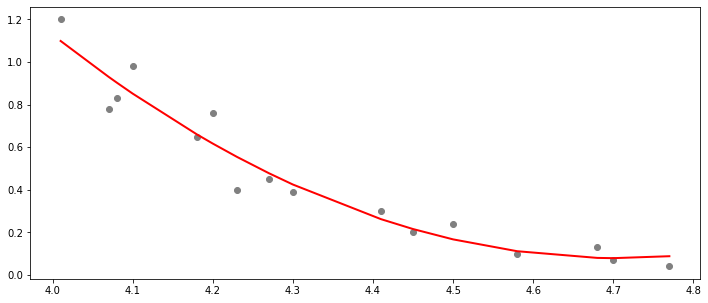

In [20]:
y_pred = lm.predict(x_quad)



plt.figure(figsize=(12,5))
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

In [21]:
lm.predict(quad.fit_transform([[5]]))

array([[0.26409551]])

<ipython-input-22-d7cfdfafbd70>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0, 0.5, 'Predicted Values'), Text(0.5, 0, 'Real Values')]

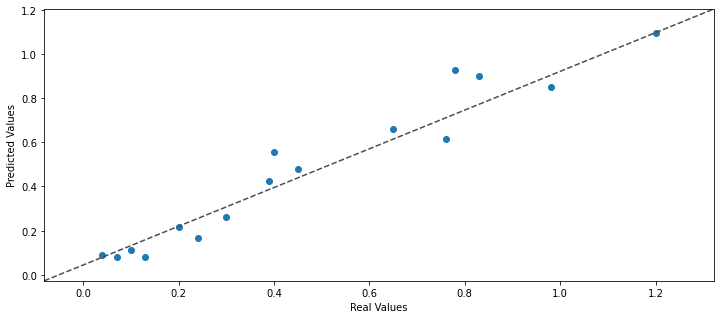

In [22]:
plt.figure(figsize=(12,5))
plt.scatter(y,y_pred)


ax = plt.axes()
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()
diag_line.set_data(x_lims, y_lims)



ax.set(xlabel='Real Values', 
       ylabel='Predicted Values')